In [220]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/My Projects/SleepEfficiencyPrediction/Sleep_Efficiency.csv')

# Display the first few rows of the dataset
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [222]:
# Data Exploration
data=data.drop(['ID'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [223]:
# Convert 'Bedtime' and 'Wakeup time' to datetime format
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'])

# Extract hour from 'Bedtime'
data['Bedtime hour'] = data['Bedtime'].dt.hour

# Encode categorical variables
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Smoking status'] = data['Smoking status'].map({'No': 0, 'Yes': 1})

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Age                     452 non-null    int64         
 1   Gender                  452 non-null    int64         
 2   Bedtime                 452 non-null    datetime64[ns]
 3   Wakeup time             452 non-null    datetime64[ns]
 4   Sleep duration          452 non-null    float64       
 5   Sleep efficiency        452 non-null    float64       
 6   REM sleep percentage    452 non-null    int64         
 7   Deep sleep percentage   452 non-null    int64         
 8   Light sleep percentage  452 non-null    int64         
 9   Awakenings              432 non-null    float64       
 10  Caffeine consumption    427 non-null    float64       
 11  Alcohol consumption     438 non-null    float64       
 12  Smoking status          452 non-null    int64     

In [225]:
data.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime hour
0,65,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,1,3.0,1
1,69,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,1,3.0,2
2,40,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0,21
3,40,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,1,1.0,2
4,57,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0,1


In [226]:
# Checking for missing values
data.isnull().sum()

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
Bedtime hour               0
dtype: int64

In [227]:
# Handle missing values by imputing with median
columns_to_impute = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for column in columns_to_impute:
    data[column].fillna(data[column].median(), inplace=True)

# Verify that there are no missing values
missing_values_after = data.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


Missing values after imputation:
 Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
Bedtime hour              0
dtype: int64


In [228]:
# Summary statistics
data.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Bedtime hour
count,452.000000,452.000000,452,452,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,2021-07-13 00:03:39.026548480,2021-07-12 20:19:22.831858176,7.465708,0.788916,22.615044,52.823009,24.561947,1.612832,23.727876,1.137168,0.340708,1.794248,10.661504
min,9.000000,0.000000,2021-01-03 00:30:00,2021-01-03 08:30:00,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,2021-04-14 01:07:30,2021-04-14 07:52:30,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,40.000000,1.000000,2021-07-20 23:30:00,2021-07-20 16:00:00,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,0.000000,2.000000,2.000000
75%,52.000000,1.000000,2021-10-11 05:22:30,2021-10-11 05:52:30,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,1.000000,3.000000,22.000000
max,69.000000,1.000000,2021-12-31 21:00:00,2021-12-31 06:30:00,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,1.000000,5.000000,23.000000
std,13.172250,0.500534,NaN,NaN,0.866625,0.135237,3.525963,15.654235,15.313665,1.332891,29.355363,1.608938,0.474472,1.418804,10.571812


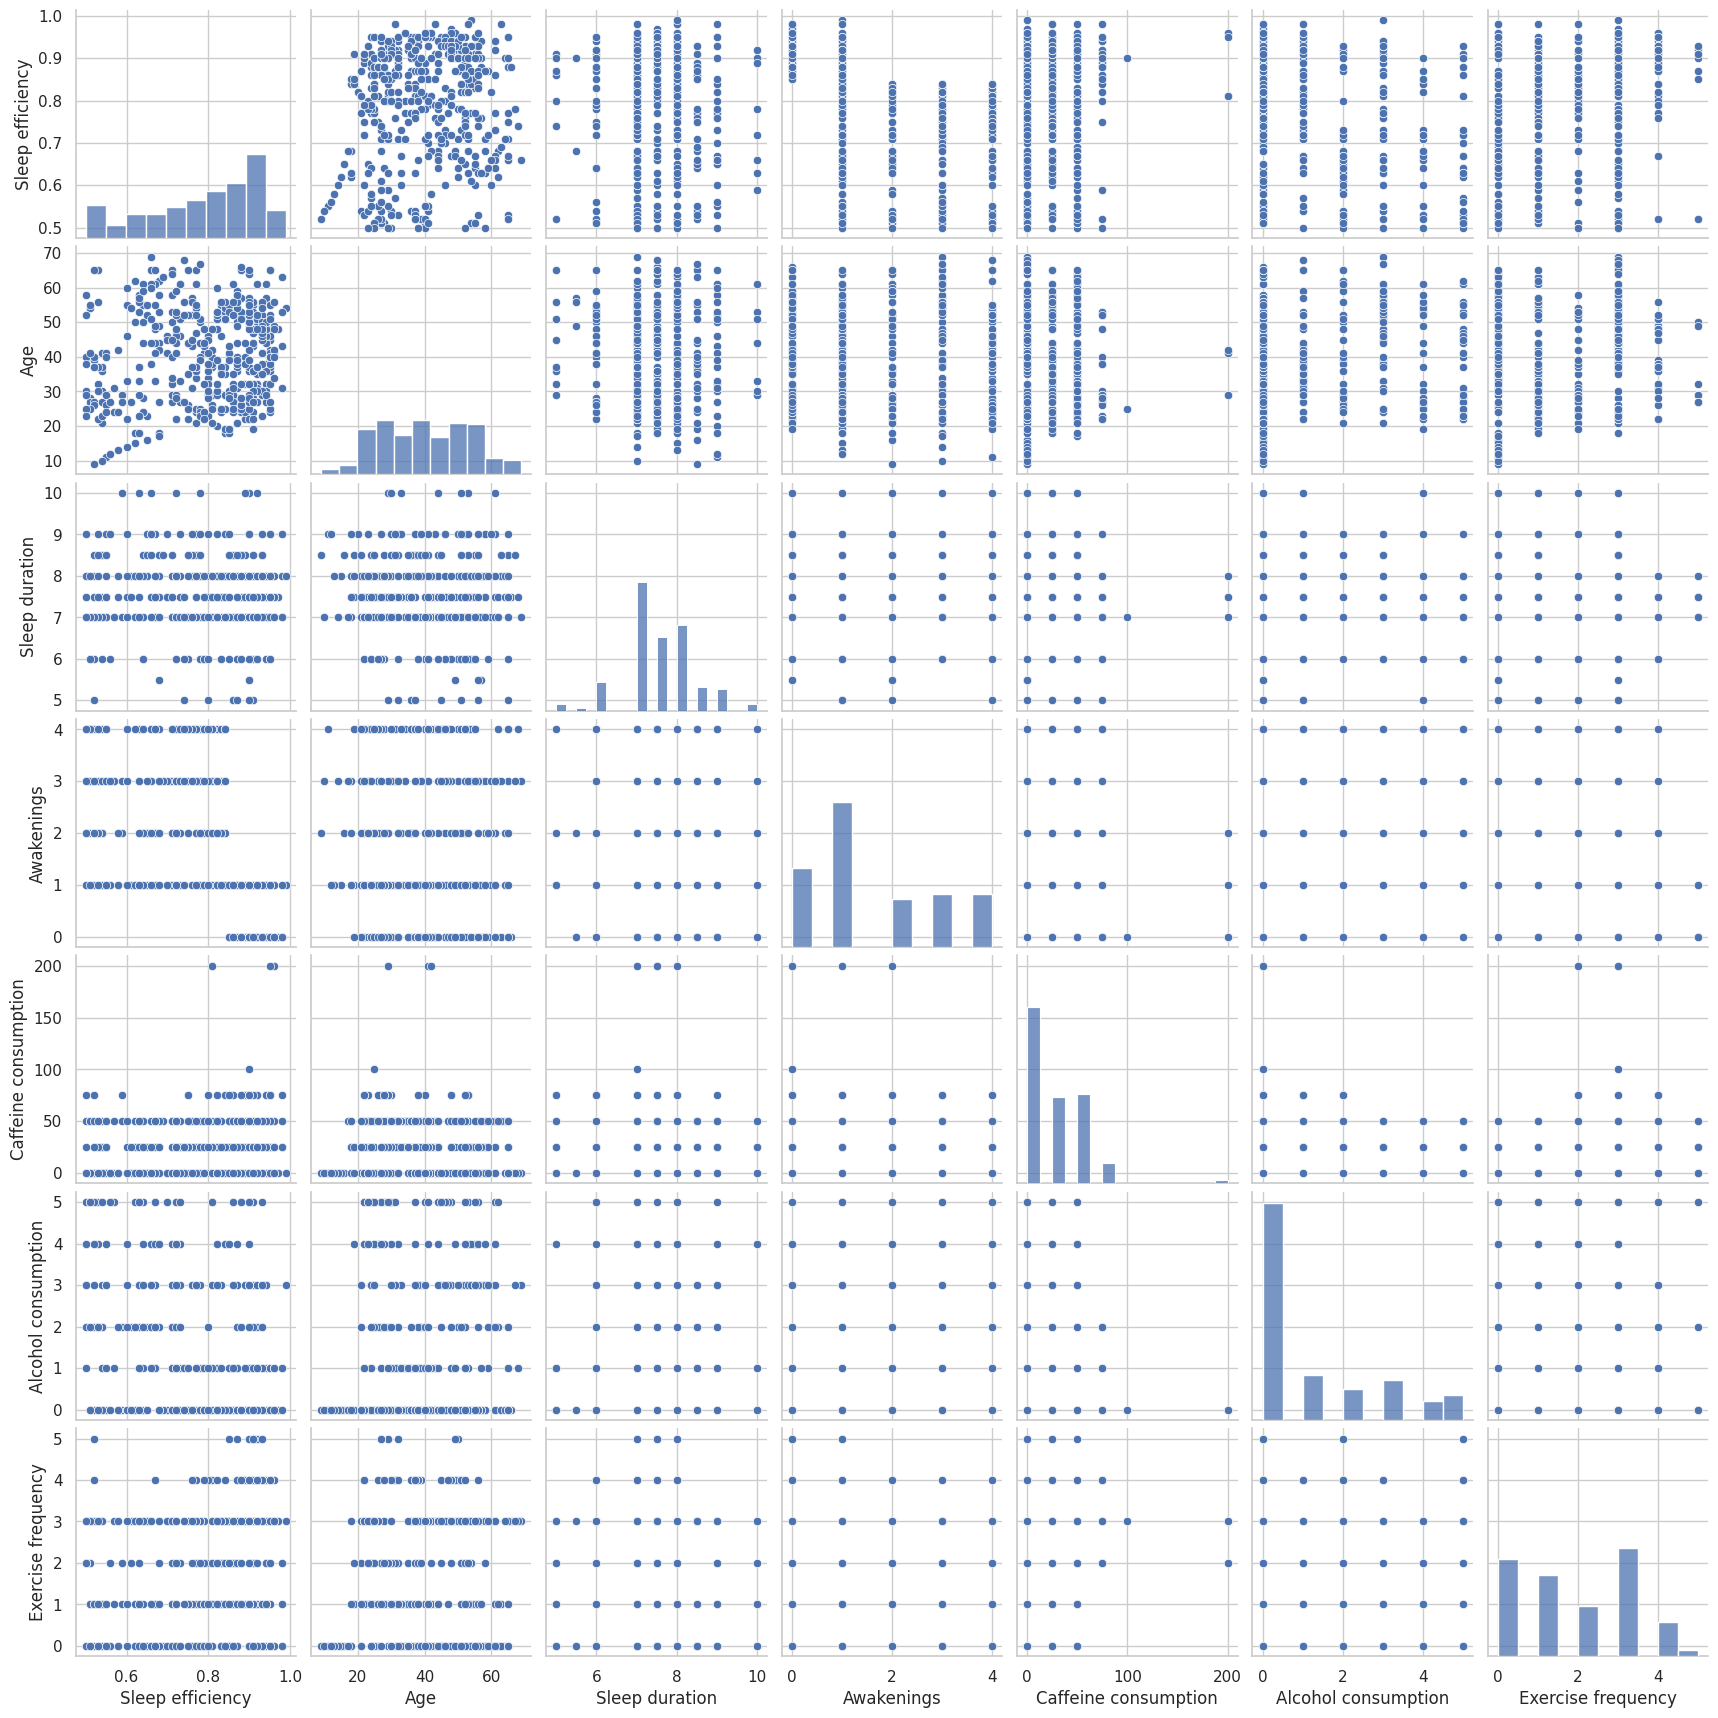

In [229]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
# Pairplot to visualize relationships between all numerical features and sleep efficiency
sns.pairplot(data[['Sleep efficiency', 'Age', 'Sleep duration', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']])
plt.show()

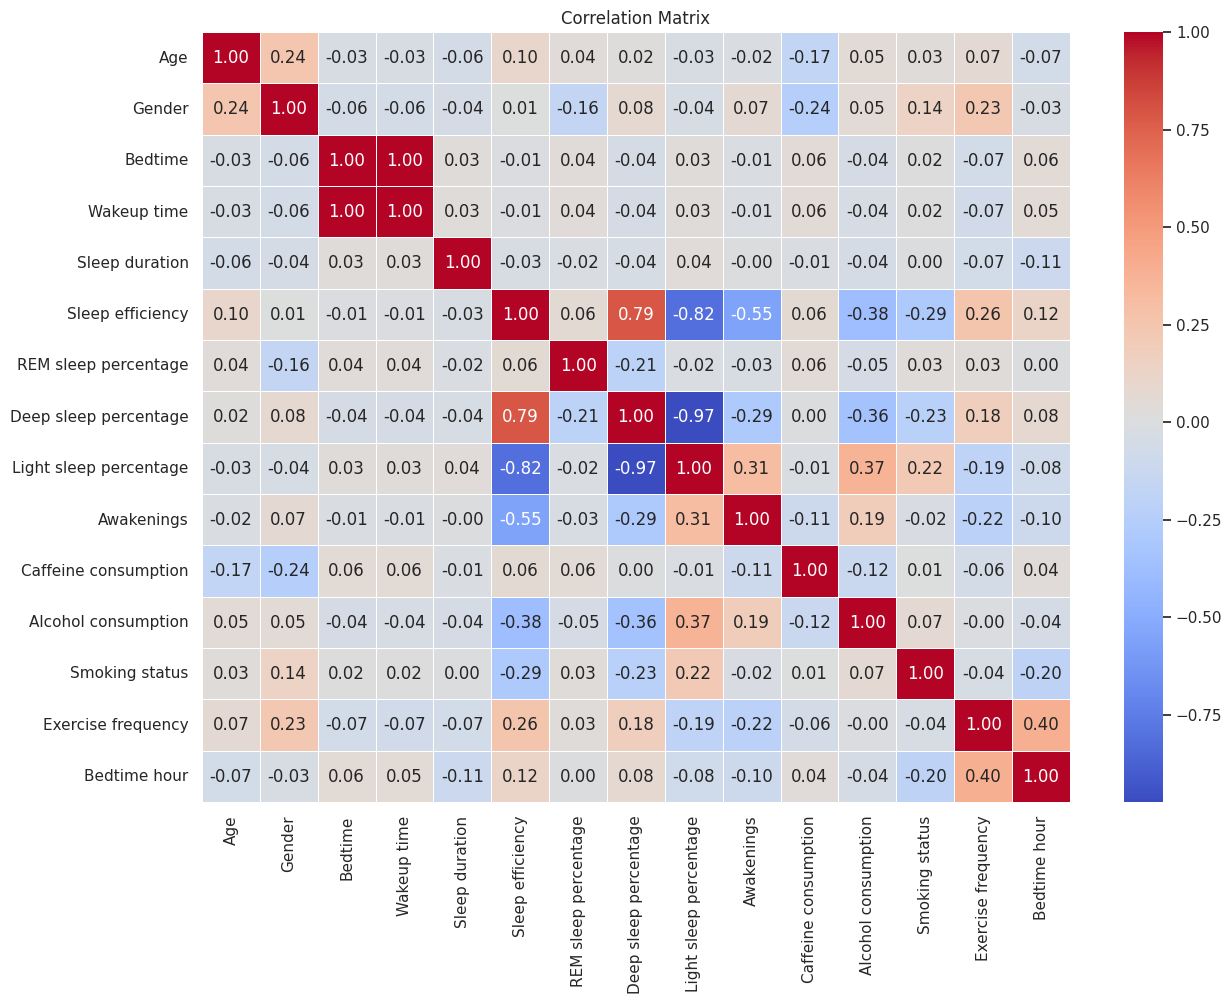

In [230]:
# Correlation matrix
corr_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


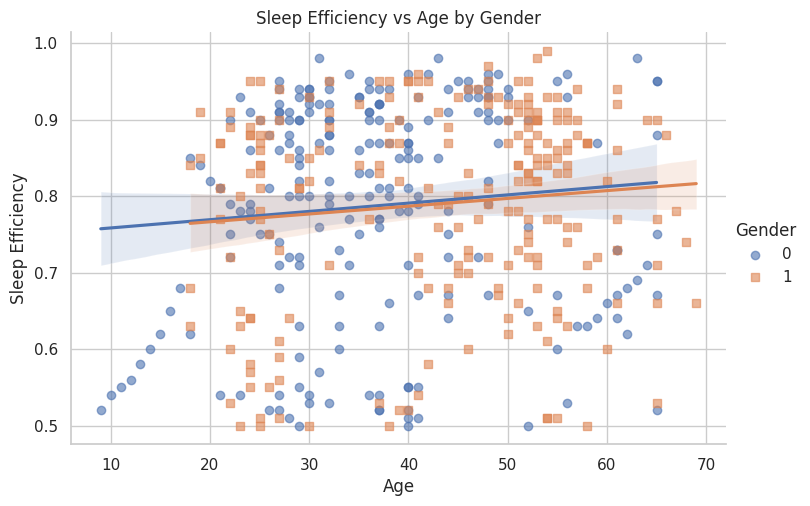

In [231]:
# Sleep Efficiency vs. Age by Gender
sns.lmplot(data=data, x='Age', y='Sleep efficiency', hue='Gender', aspect=1.5, markers=['o', 's'], scatter_kws={'alpha':0.6})
plt.title('Sleep Efficiency vs Age by Gender')
plt.xlabel('Age')
plt.ylabel('Sleep Efficiency')
plt.show()

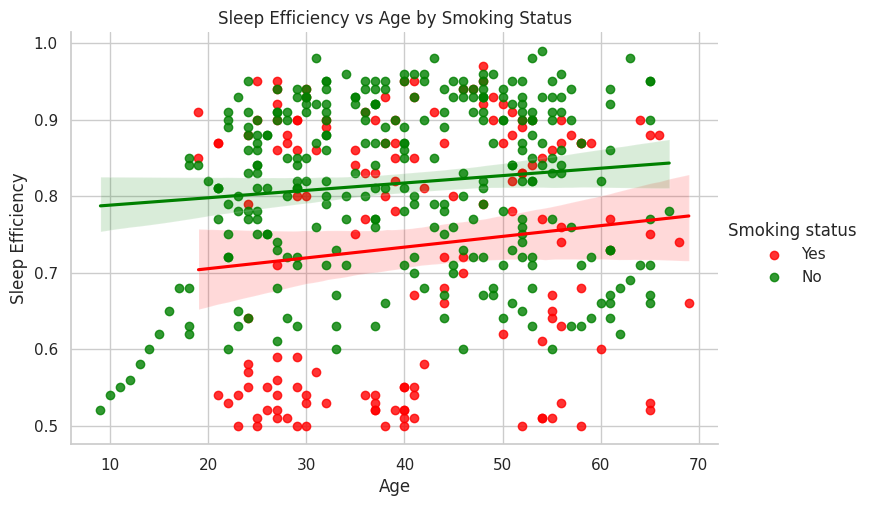

In [232]:
# Convert Smoking status back to categorical labels
data['Smoking status'] = data['Smoking status'].map({0: 'No', 1: 'Yes'})

# Plot Sleep Efficiency vs Age by Smoking Status
sns.lmplot(data=data, x='Age', y='Sleep efficiency', hue='Smoking status', palette={'Yes':'red', 'No':'green'}, aspect=1.5)
plt.title('Sleep Efficiency vs Age by Smoking Status')
plt.xlabel('Age')
plt.ylabel('Sleep Efficiency')
plt.show()


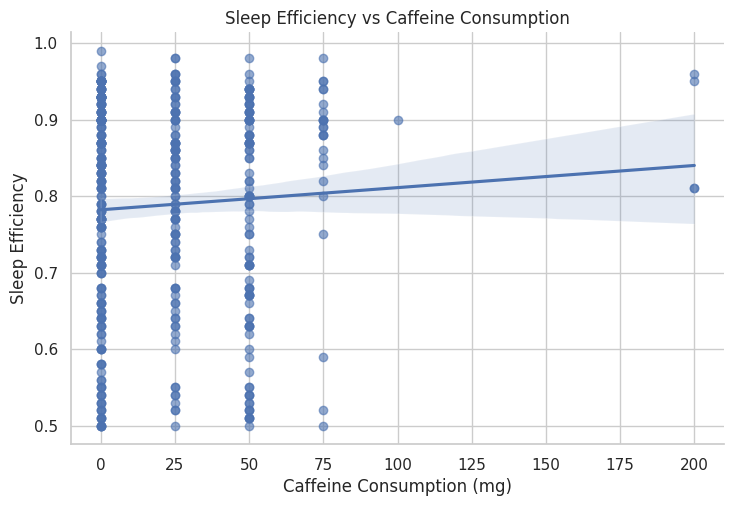

In [233]:
# Sleep Efficiency vs. Caffeine Consumption
sns.lmplot(data=data, x='Caffeine consumption', y='Sleep efficiency', aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Sleep Efficiency vs Caffeine Consumption')
plt.xlabel('Caffeine Consumption (mg)')
plt.ylabel('Sleep Efficiency')
plt.show()

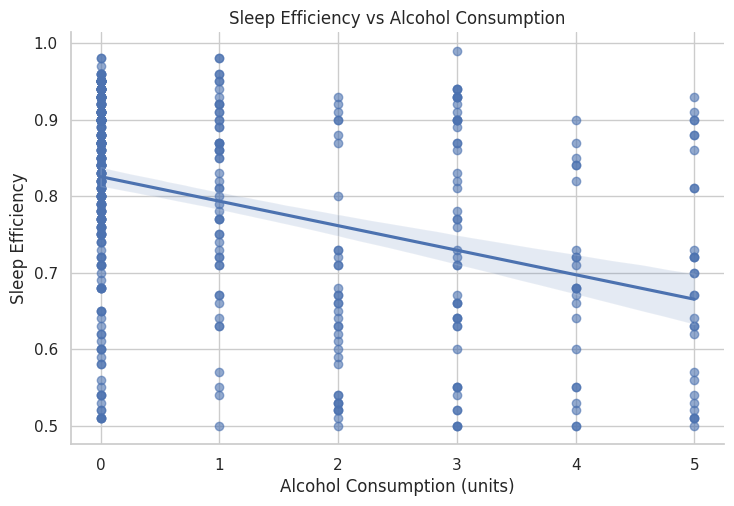

In [234]:
# Sleep Efficiency vs. Alcohol Consumption
sns.lmplot(data=data, x='Alcohol consumption', y='Sleep efficiency', aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Sleep Efficiency vs Alcohol Consumption')
plt.xlabel('Alcohol Consumption (units)')
plt.ylabel('Sleep Efficiency')
plt.show()

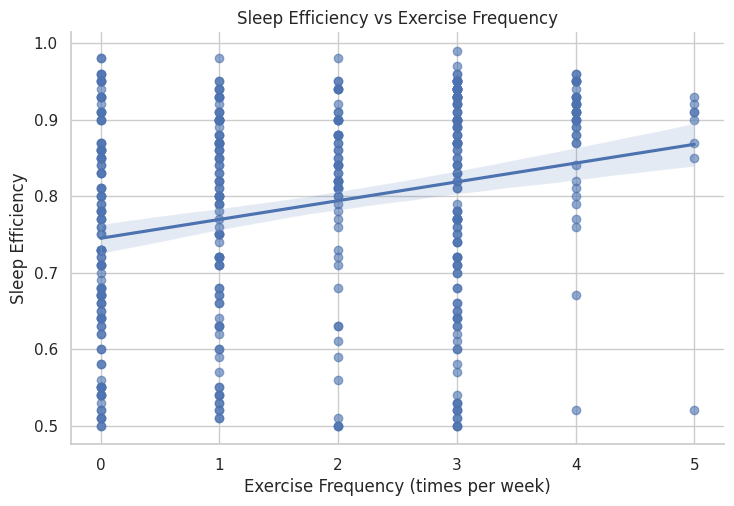

In [235]:
# Sleep Efficiency vs. Exercise Frequency
sns.lmplot(data=data, x='Exercise frequency', y='Sleep efficiency', aspect=1.5, scatter_kws={'alpha':0.6})
plt.title('Sleep Efficiency vs Exercise Frequency')
plt.xlabel('Exercise Frequency (times per week)')
plt.ylabel('Sleep Efficiency')
plt.show()

In [236]:
from sklearn.model_selection import train_test_split
# Extract features and multiple target variables
X = data[['Age', 'Gender', 'Sleep duration', 'Awakenings', 'Smoking status', 'Exercise frequency', 'Caffeine consumption', 'Alcohol consumption']]
y = data[['Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage']]

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [237]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [238]:
# Define a list of regressors to try
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize empty dictionary to store results
results = {}


In [239]:
for name, regressor in regressors.items():
    print(f"Training {name}...")

    # Initialize MultiOutputRegressor with current regressor
    multi_output_regressor = MultiOutputRegressor(regressor)

    # Train the model
    multi_output_regressor.fit(X_train, y_train)

    # Predict on test set
    y_test_pred = multi_output_regressor.predict(X_test)

    # Calculate RMSE and R-squared for each target
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
    r2 = r2_score(y_test, y_test_pred, multioutput='raw_values')
    mae = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

    # Store results
    results[name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R^2': r2
    }

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...


In [240]:
# Print results
print("\nResults Summary:")
for name, result in results.items():
    print(f"Model: {name}")
    print(f"MAE: {result['MAE']}")
    print(f"RMSE: {result['RMSE']}")
    print(f"R^2: {result['R^2']}")
    print()



Results Summary:
Model: Linear Regression
MAE: [ 0.07496442  2.89312757 10.38628619 10.31449267]
RMSE: [ 0.09486905  3.43678047 13.36517108 12.70351104]
R^2: [0.51659119 0.05253404 0.26861529 0.28428758]

Model: Ridge Regression
MAE: [ 0.07494411  2.89313014 10.38792038 10.31338142]
RMSE: [ 0.09488436  3.43729371 13.36686419 12.70353234]
R^2: [0.51643521 0.05225104 0.26842998 0.28428518]

Model: Lasso Regression
MAE: [ 0.11781285  2.92245807 10.6583307  10.3639486 ]
RMSE: [ 0.13656383  3.52776144 13.75534493 12.94079781]
R^2: [-0.00169804  0.00170603  0.22528886  0.25730052]

Model: Decision Tree
MAE: [ 0.07098901  2.82967033 10.01098901 10.3021978 ]
RMSE: [ 0.10326537  4.10875506 16.27476979 17.36399268]
R^2: [ 0.42723715 -0.3541929  -0.08449247 -0.33718102]

Model: Random Forest
MAE: [0.05722736 2.61021978 9.14958791 7.82110806]
RMSE: [ 0.07804504  3.20591909 12.87277752 11.11469391]
R^2: [0.67284311 0.17554844 0.32151327 0.45211927]

Model: Gradient Boosting
MAE: [0.06721142 2.7857

In [241]:
# Find the model with the lowest MAE for each target
best_model_mae = {}
for model_name, metrics in results.items():
    best_model_mae[model_name] = min(metrics['MAE'])

# Find the model with the lowest RMSE for each target
best_rmse_models = {}
for model_name, metrics in results.items():
    best_rmse_models[model_name] = min(metrics['RMSE'])

# Find the model with the highest R^2 for each target
best_r2_models = {}
for model_name, metrics in results.items():
    best_r2_models[model_name] = max(metrics['R^2'])

# Determine the overall best modeal based on the lowest average RMSE and highest average R^2
avg_mae = {model_name: np.mean(metrics['MAE']) for model_name, metrics in results.items()}
avg_rmse = {model_name: np.mean(metrics['RMSE']) for model_name, metrics in results.items()}
avg_r2 = {model_name: np.mean(metrics['R^2']) for model_name, metrics in results.items()}

# Select the best model based on the criteria
best_model_mae = min(avg_mae, key=avg_mae.get)
best_model_rmse = min(avg_rmse, key=avg_rmse.get)
best_model_r2 = max(avg_r2, key=avg_r2.get)

print(f"Best Model based on Lowest Average RMSE: {best_model_rmse} with RMSE: {avg_rmse[best_model_rmse]}")
print(f"Best Model based on Lowest Average MAE: {best_model_mae} with MAE: {avg_mae[best_model_mae]}")
print(f"Best Model based on Highest Average R^2: {best_model_r2} with R^2: {avg_r2[best_model_r2]}")

Best Model based on Lowest Average RMSE: Random Forest with RMSE: 6.817858891241787
Best Model based on Lowest Average MAE: Random Forest with MAE: 4.909535778388278
Best Model based on Highest Average R^2: Random Forest with R^2: 0.4055060217333789


In [242]:
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
r2 = r2_score(y_test, y_test_pred, multioutput='raw_values')
mae = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R2: ", r2)

RMSE:  [ 0.07804504  3.20591909 12.87277752 11.11469391]
MAE:  [0.05722736 2.61021978 9.14958791 7.82110806]
R2:  [0.67284311 0.17554844 0.32151327 0.45211927]


In [243]:
# import joblib
# joblib.dump(model, 'multioutput_gb_model.pkl')
import pickle
with open('multioutput_gb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [244]:
import numpy as np
import sklearn
import joblib

print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)


numpy version: 1.25.2
scikit-learn version: 1.2.2
joblib version: 1.4.2


In [245]:
X.head()

,Age,Gender,Sleep duration,Awakenings,Exercise frequency,Caffeine consumption,Alcohol consumption,Smoking status_No,Smoking status_Yes
0,65,0,6.0,0.0,3.0,0.0,0.0,False,True
1,69,1,7.0,3.0,3.0,0.0,3.0,False,True
2,40,0,8.0,1.0,3.0,0.0,0.0,True,False
3,40,0,6.0,3.0,1.0,50.0,5.0,False,True
4,57,1,8.0,3.0,3.0,0.0,3.0,True,False
